In [278]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [279]:
def zobrazit_obl(matice, x0, xn, t0, tn):
    obrazek = np.rot90(deepcopy(matice))
    plt.figure(figsize=(8,8))
    plt.imshow(obrazek, cmap='jet',extent=[x0, xn, t0, tn] )
    plt.colorbar(shrink = 0.5)
    plt.show()

## Pocatecni podminky a vytvoreni mrizky

In [280]:
x0, xn, h = 0., 4. , 0.1
t0, tn, tau = 0., 4. , 0.01
parametry = [x0, xn, t0, tn]

sigma = 0.5 * tau / h**2

b = 4.
u_t0 = 1
u_bt = 1/ (1 + b**2)
u_x = [1/ (1 + xi**2) for xi in np.arange(x0, xn+h, h)]

x = np.arange(x0, xn+h, h)
t = np.arange(t0, tn+tau, tau )

len_x,len_t = len(x), len(t)

u = np.zeros((len_x, len_t))
u[:, 0] = u_x
u[0, :] = u_t0
u[-1, :] = u_bt

In [281]:
u.shape

(41, 401)

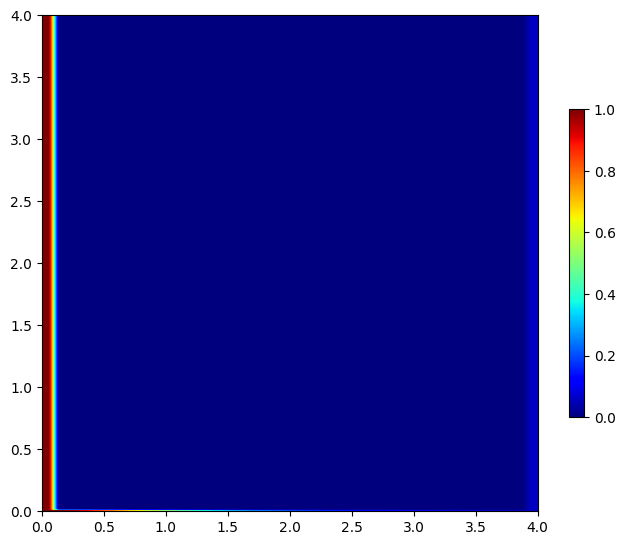

In [282]:
zobrazit_obl(u, *parametry)

## Implicitni metoda

In [283]:
sub_d = [-sigma] * (len_x-1)
hl_d = [1 + 2. * sigma] * len_x

A = np.diag(hl_d) + np.diag(sub_d, -1) + np.diag(sub_d, 1)
A[0, :] = A[-1, :] = 0
A[0, 0] = A[-1, -1] = 1

In [284]:
for k in range(len(t) - 1):
    g = u[:, k] + tau * np.sin(t[k+1])  # prava strana
    g[0], g[-1] = 1, 1 / (1 + xn**2)    # okrajove podmínky
    u[:, k+1] = np.linalg.solve(A, g)

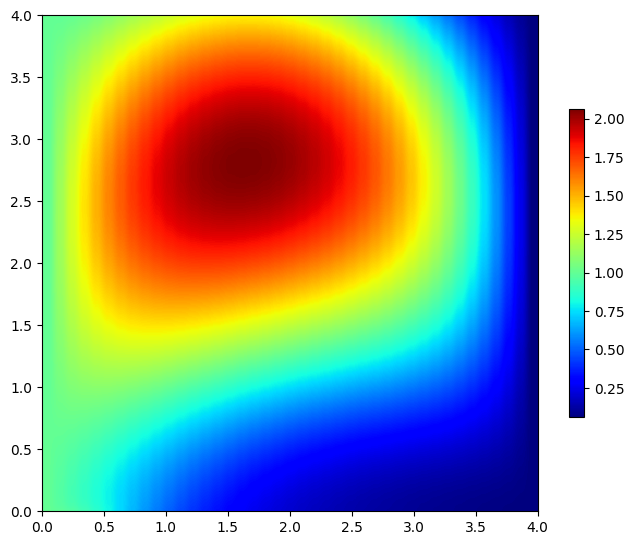

In [285]:
zobrazit_obl(u, *parametry)